In [1492]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import scipy as sp
df=pd.read_csv('stud_math.csv')

In [1493]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 60)
display(df.head(10))
df.info()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [1494]:
df.age.max()

22

Первые три колонки не имеют пустых значений и выбросов.

Рассмотрим сразу две колонки **studytime** и **studytime, granular**.
Похоже, что вторая содержит значения первой, умноженные на -3.

In [1495]:
df.loc[:,['studytime', 'studytime, granular'] ]

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [1496]:
df[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


Здесь мы видим полную обратную корреляцию, следовательно, колонку **studytime, granular** можно удалить.

In [1497]:
df.drop(['studytime, granular'], inplace = True, axis = 1)

Теперь расммотрим на предмет пустых значений и отклонений все колонки.
Я постаралась найти взимосвязь каждой колонки с другими, наиболее связанными с ней по смыслу (на мой взгляд) и ,исходя из этого, заменить пустые значения и отклонения от нормы на среднее/часто встречаемое/наиболее подходящее.

# Address

In [1498]:
df[df.address.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN


In [1499]:
df[(df.address.isna())&(df.reason=='home')].traveltime.value_counts()

1.0    5
2.0    1
3.0    1
Name: traveltime, dtype: int64

In [1500]:
df[(df.address.isna())&(df.traveltime.isna())].reason

241        course
348    reputation
372          home
Name: reason, dtype: object

In [1501]:
df[(df.school=='MS')&(df.address=='U')&(df.traveltime>2)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [1502]:
df[(df.school=='GP')&(df.address=='U')&(df.traveltime>2)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
50,GP,F,16,U,LE3,T,2.0,2.0,services,services,course,mother,3.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,3.0,4.0,2.0,65.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
149,GP,M,15,U,LE3,NaN,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,NaN,no,no,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,NaN,no,yes,no,yes,no,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
228,GP,M,18,U,NaN,T,2.0,1.0,at_home,other,course,mother,4.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
245,GP,M,16,U,GT3,NaN,2.0,1.0,other,other,course,mother,3.0,1.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,3.0,3.0,4.0,6.0,90.0


In [1503]:
df[(df.school=='GP')&(df.address=='U')&(df.traveltime<=2)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,GP,M,18,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,no,no,no,yes,yes,yes,yes,NaN,4.0,3.0,3.0,NaN,11.0,75.0
343,GP,F,17,U,GT3,A,2.0,2.0,at_home,at_home,home,father,1.0,2.0,1.0,no,yes,no,no,yes,yes,yes,yes,3.0,3.0,1.0,4.0,0.0,0.0
344,GP,F,18,U,NaN,T,2.0,3.0,at_home,other,course,NaN,1.0,3.0,NaN,no,yes,no,no,yes,yes,yes,no,4.0,3.0,3.0,3.0,4.0,50.0
345,GP,F,18,U,GT3,T,3.0,2.0,other,NaN,other,mother,1.0,3.0,0.0,no,no,no,no,yes,yes,yes,yes,5.0,4.0,3.0,1.0,7.0,70.0


Здесь заменяю пустые значения в колонке **address** исходя из времени на дорогу **traveltime**. Если в колонке **traveltime** тоже нет информации, тогда опираюсь на инфо из колонки **reason**.

In [1504]:
df['address'].loc[(df.address.isna())&(df.traveltime<=2)] = 'U'
df['address'].loc[(df.address.isna())&(df.traveltime>2)] = 'R'
df['address'].loc[(df.address.isna())&(df.traveltime.isna())&(df.reason=='home')] = 'U'
df['address'].loc[(df.address.isna())&(df.traveltime.isna())&(df.reason!='home')] = 'R'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# ------------------------------------------------------------------------------------

In [1505]:
pd.DataFrame(df.school.value_counts())
#df.school.value_counts()
df.groupby(['school']).score.mean()

school
GP    52.630814
MS    49.444444
Name: score, dtype: float64

In [1506]:
pd.DataFrame(df.address.value_counts())
#df.groupby(['address']).score.mean()

,address
U,309
R,86


In [1507]:
pd.DataFrame((df.school=='GP')&(df.address=='U')).value_counts()

True     287
False    108
dtype: int64

# --------------------------------------------------------------------------------------------------------
# famsize
Единственное, что, на мой взгляд, может быть связано с составом семьи - это совместное или раздельное проживание ученика с родителями. Но это предположение не дало никакой информации. Поэтому пустые значния заменя на наиболее часто втсречающееся. 

In [1508]:
df.loc[df.famsize.isna(), ['age','famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'guardian', 'famsup', 'paid', 'famrel']]

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,paid,famrel
0,18,NaN,A,4.0,4.0,at_home,teacher,mother,no,no,4.0
9,15,NaN,NaN,3.0,4.0,other,other,mother,yes,yes,5.0
32,15,NaN,T,4.0,3.0,teacher,at_home,mother,yes,no,4.0
36,15,NaN,T,4.0,3.0,teacher,services,mother,yes,no,5.0
76,15,NaN,T,4.0,0.0,teacher,other,mother,no,no,3.0
78,17,NaN,T,2.0,1.0,other,other,mother,NaN,no,4.0
79,16,NaN,T,3.0,4.0,at_home,other,mother,yes,no,2.0
114,15,NaN,T,2.0,1.0,health,services,mother,no,no,5.0
128,18,NaN,T,2.0,2.0,NaN,other,mother,yes,no,3.0
129,16,NaN,T,4.0,4.0,teacher,teacher,mother,no,yes,3.0


In [1509]:
df[df.famsize.isna()].Pstatus.mode()

0    T
dtype: object

In [1510]:
df.famsize.mode()

0    GT3
dtype: object

In [1511]:
df.loc[df.famsize=='GT3', ['Pstatus']].Pstatus.value_counts()

T    213
A     20
Name: Pstatus, dtype: int64

In [1512]:
df.loc[df.famsize=='LE3', ['Pstatus']].Pstatus.value_counts()

T    81
A    13
Name: Pstatus, dtype: int64

In [1513]:
df.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [1514]:
df['famsize'].loc[df.famsize.isna()]='GT3'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1515]:
df[df.famsize.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


# Pstatus
Здесь уже может быть гараздо больше взаимосвязей. Но самые явные с колонкой absences. Поэтому пришлось проработать колонку absences(проверить на наличие выбросов, заменить их и пустые значения на среднее), а уже потом прописывать условия замены пустых значений в Pstatus в заивисимости от баллов и посещения.


In [1516]:
df[df.Pstatus.isna()].sex.value_counts()

F    24
M    21
Name: sex, dtype: int64

In [1517]:
df[df.Pstatus=="A"].groupby(['sex']).age.value_counts()

sex  age
F    16     6
     17     6
     15     4
     18     4
     19     1
M    15     6
     17     3
     16     2
     20     2
     18     1
     19     1
Name: age, dtype: int64

In [1518]:
df[df.Pstatus=="T"].groupby(['sex']).age.value_counts()

sex  age
F    17     46
     16     42
     18     34
     15     29
     19     11
     20      1
M    16     40
     17     35
     15     34
     18     33
     19      7
     21      1
     22      1
Name: age, dtype: int64

In [1519]:
df.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

In [1520]:
df[df.Pstatus.isna()].famrel.mean()

3.8444444444444446

In [1521]:
df[df.Pstatus=="A"].famrel.mean()

3.90625

In [1522]:
df[df.Pstatus=="T"].famrel.mean()

3.9553264604811

In [1523]:
df[(df.Pstatus=="T")&(df.famrel>=3)].famrel.value_counts()

4.0    150
5.0     75
3.0     48
Name: famrel, dtype: int64

In [1524]:
df[(df.Pstatus=="A")].freetime.value_counts()

3.0    16
2.0     6
4.0     5
5.0     5
1.0     3
Name: freetime, dtype: int64

In [1525]:
df[(df.Pstatus=="T")].freetime.value_counts()

3.0    117
4.0    100
2.0     47
5.0     28
1.0     13
Name: freetime, dtype: int64

In [1526]:
df[(df.Pstatus=="T")].studytime.value_counts()

2.0    154
1.0     80
3.0     57
4.0     19
Name: studytime, dtype: int64

In [1527]:
df[(df.Pstatus=="A")].absences.median()

6.0

In [1528]:
df[(df.Pstatus=="T")].absences.median()

3.0

count     36.000000
mean      15.000000
std       36.318433
min        0.000000
25%        0.000000
50%        6.000000
75%       12.000000
max      212.000000
Name: absences, dtype: float64

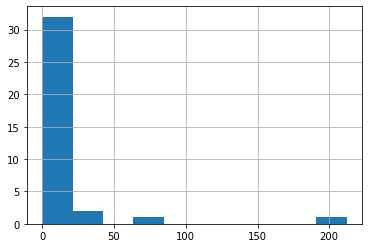

In [1529]:
df[(df.Pstatus=="A")].absences.hist()
df[(df.Pstatus=="A")].absences.describe()

count    304.000000
mean       6.358553
std       22.741619
min        0.000000
25%        0.000000
50%        3.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

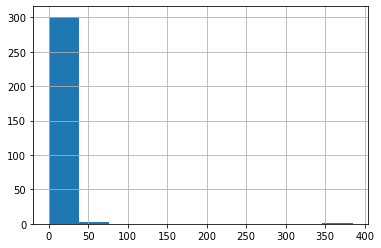

In [1530]:
df[(df.Pstatus=="T")].absences.hist()
df[(df.Pstatus=="T")].absences.describe()

In [1531]:
df[(df.Pstatus=="T")&(df.absences==df.absences.max())]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0


In [1532]:
df.loc[(df.Pstatus=="A"),['absences', 'score', 'age']]

,absences,score,age
0,6.0,30.0,18
7,6.0,30.0,17
8,0.0,95.0,15
14,0.0,80.0,15
37,7.0,75.0,16
45,8.0,30.0,15
46,12.0,55.0,16
52,6.0,50.0,15
55,8.0,50.0,16
56,0.0,75.0,15


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


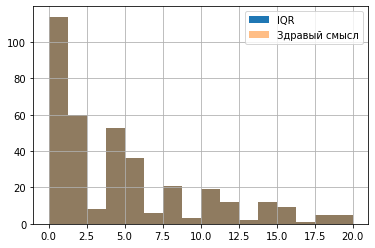

In [1533]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.absences.loc[df.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, label = 'IQR')
 
df.absences.loc[df.absences <= 20].hist(
alpha = 0.5, bins = 16, label = 'Здравый смысл')
 
plt.legend();

In [1534]:
#df = df.loc[df.absences <= 30]

In [1535]:
df.absences.loc[df.absences <= 20].describe()

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

In [1536]:
df['absences'].loc[(df.absences>20)] = round(df.absences.loc[df.absences <= 20].mean())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1537]:
df[df.absences.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,GT3,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,U,GT3,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


In [1538]:
round(df[df.score<75].absences.mean())

5

In [1539]:
round(df[df.score>90].absences.mean())

4

In [1540]:
df[df.absences.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,GT3,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,U,GT3,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


In [1541]:
df[df.Pstatus=="A"].absences.mean()

6.111111111111111

In [1542]:
df[df.Pstatus=="A"].score.mean()

55.138888888888886

In [1543]:
df[df.Pstatus=="T"].absences.mean()

4.509868421052632

In [1544]:
df[df.Pstatus=="T"].score.mean()

51.70454545454545

Замена пустых значений колонки **Pstatus** на статус в зависимости от пропущенных занятий и баллов.

In [1545]:
df['Pstatus'].loc[(df.Pstatus.isna())&(df.absences<=6)&(df.score>=75)] = 'T'
df['Pstatus'].loc[(df.Pstatus.isna())&(df.absences>6)&(df.score>=90)] = 'T'
df['Pstatus'].loc[(df.Pstatus.isna())&(df.absences<=6)&(df.score<75)] = 'A'
df['Pstatus'].loc[(df.Pstatus.isna())&(df.absences>6)&(df.score<=75)] = 'A'
df['Pstatus'].loc[(df.Pstatus.isna())&(df.absences.isna())&(df.score<=60)] = 'A'
df['Pstatus'].loc[(df.Pstatus.isna())&(df.absences.isna())&(df.score>=75)] = 'T'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [1546]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,A,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Medu
Здесть я смотрю на связь образвания и работы, а также на образование отца.


In [1547]:
df[df.Medu.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,U,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,A,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,A,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


In [1548]:
df.Medu.describe()

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

In [1549]:
df.groupby(['Mjob']).Medu.mean()

Mjob
at_home     1.706897
health      3.625000
other       2.404580
services    2.835052
teacher     3.945455
Name: Medu, dtype: float64

In [1550]:
df['Medu'].loc[(df.Medu.isna())&(df.Mjob=='other')&(df.guardian=='father')] = 1
df['Medu'].loc[(df.Medu.isna())&(df.Mjob=='other')&(df.guardian=='mother')] = 2
df['Medu'].loc[(df.Medu.isna())&(df.Mjob=='services')] = 3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# Fedu
Здесь также рассматриваем взаимосвязь с работой, образванием матери. Но в случае с образованием отца этой информации оказывается мало.


In [1551]:
df[df.Fedu.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,A,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,U,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [1552]:
df.Fedu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [1553]:
df['Fedu'].loc[(df.Fedu==df.Fedu.max())] = 4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1554]:
df.Fedu.mean()

2.5175202156334233

In [1555]:
df[df.Fjob=='teacher'].Fedu.mean()

3.9615384615384617

In [1556]:
df[df.Fjob=='health'].Fedu.mean()

3.3846153846153846

In [1557]:
df[df.Fjob=='services'].Fedu.mean()

2.4893617021276597

In [1558]:
df[df.Fjob=='other'].Fedu.mean()

2.3210526315789473

In [1559]:
df[df.Fjob=='at_home'].Fedu.mean()

2.2857142857142856

In [1560]:
df[df.Fedu==1].Fjob.value_counts()

other       48
services    19
at_home      3
health       1
Name: Fjob, dtype: int64

In [1561]:
df[df.Fedu==2].Fjob.value_counts()

other       58
services    27
at_home      6
health       1
Name: Fjob, dtype: int64

In [1562]:
df[df.Fedu==3].Fjob.value_counts()

other       51
services    31
at_home      3
health       3
teacher      1
Name: Fjob, dtype: int64

In [1563]:
df[df.Fedu==4].Fjob.value_counts()

other       31
teacher     25
services    17
health       8
at_home      2
Name: Fjob, dtype: int64

In [1564]:
df[df.Fedu==0].Fjob.value_counts()

other    2
Name: Fjob, dtype: int64

In [1565]:
df[df.Medu==0].Mjob.value_counts()

at_home    2
other      1
Name: Mjob, dtype: int64

In [1566]:
df[['Fedu', 'Medu']].corr()

,Fedu,Medu
Fedu,1.000000,0.627531
Medu,0.627531,1.000000


In [1567]:
df[df.guardian=='father'].Fedu.mean()

2.721518987341772

In [1568]:
df[df.guardian=='father'].Fjob.value_counts()

services    31
other       30
teacher      8
health       5
at_home      4
Name: Fjob, dtype: int64

In [1569]:
df.Fjob.mode()

0    other
dtype: object

Чтобы лучше увидеть зваимосвязь образования и работы, строим boxplots

In [1570]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 10))
    sns.boxplot(x=column, y='Fedu', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

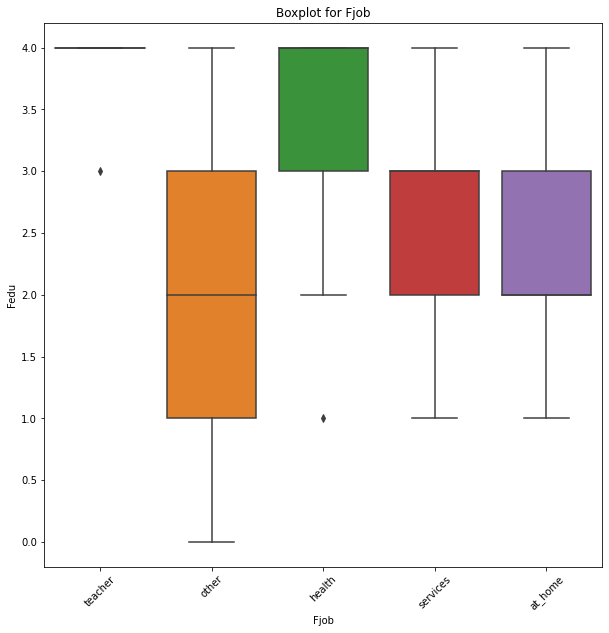

In [1571]:
get_boxplot('Fjob')

Заменяем пустые занчения в колонке Fedu исходя из данных Fjob, если в Fjob тоже пусто, то на средее 3.

In [1572]:
df['Fedu'].loc[(df.Fedu.isna())&(df.Fjob=='other')] = 2
df['Fedu'].loc[(df.Fedu.isna())&(df.Fjob.isin(['services', 'at_home']))] = 3
df['Fedu'].loc[(df.Fedu.isna())&(df.Fjob.isin(['teacher', 'health']))] = 4


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1573]:
round(df.Fedu.mean())

3

In [1574]:
df['Fedu'].loc[(df.Fedu.isna())&(df.Fjob.isna())] = round(df.Fedu.mean())


# Fjob and Mjob
Здесь пустые значения заменяются исходя из образования.



In [1575]:
df[df.Fjob.isna()]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0


In [1576]:
#df[df.Mjob.isna()].info()
df.Mjob.value_counts()
print(df[df.Mjob=='other'].Medu.mean())
print(df[df.Mjob=='teacher'].Medu.mean())
print(df[df.Mjob=='health'].Medu.mean())
df[df.Mjob=='services'].Medu.mean()
df.Mjob.value_counts()

2.3834586466165413
3.9454545454545453
3.625


other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [1577]:
print(df[df.Fjob=='other'].Fedu.mean())
print(df[df.Fjob=='teacher'].Fedu.mean())
print(df[df.Fjob=='health'].Fedu.mean())
df[df.Fjob=='services'].Fedu.mean()

2.3096446700507616
3.9655172413793105
3.466666666666667


2.5294117647058822

In [1578]:
df['Fjob'].loc[(df.Fjob.isna())&(df.Fedu<=2)] = 'other'
df['Fjob'].loc[(df.Fjob.isna())&(df.Fedu==3)] = 'services'
df['Fjob'].loc[(df.Fjob.isna())&(df.Fedu==4)] = 'teacher'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [1579]:
df['Mjob'].loc[(df.Mjob.isna())&(df.Medu<=2)] = 'other'
df['Mjob'].loc[(df.Mjob.isna())&(df.Medu==3)] = 'services'
df['Mjob'].loc[(df.Mjob.isna())&(df.Medu==4)] = 'teacher'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

# reason
Причина, по которой выбрана школа, может быть приблизительно определена в зависимости от времени на дорогу. Можно предположить, что те, у кого время на дорогу в категории 1, скорее всего выбрали школу из-за близости к дому, а у кого в категории 2 и более - из-за курса.

In [1580]:
df[df.reason.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,A,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,GP,F,16,U,GT3,A,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
137,GP,F,16,U,GT3,A,3.0,2.0,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,GP,M,16,U,GT3,A,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0


In [1581]:
df[df.reason.isna()].score.mean()

50.588235294117645

In [1582]:
df[df.reason.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 33 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      17 non-null     object 
 1   sex         17 non-null     object 
 2   age         17 non-null     int64  
 3   address     17 non-null     object 
 4   famsize     17 non-null     object 
 5   Pstatus     17 non-null     object 
 6   Medu        17 non-null     float64
 7   Fedu        17 non-null     float64
 8   Mjob        17 non-null     object 
 9   Fjob        17 non-null     object 
 10  reason      0 non-null      object 
 11  guardian    16 non-null     object 
 12  traveltime  15 non-null     float64
 13  studytime   16 non-null     float64
 14  failures    17 non-null     float64
 15  schoolsup   16 non-null     object 
 16  famsup      14 non-null     object 
 17  paid        16 non-null     object 
 18  activities  16 non-null     object 
 19  nursery     17 non-null     o

In [1583]:
df.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [1584]:
df[df.reason=='home'].score.median()

55.0

In [1585]:
df[df.reason=='course'].score.median()

50.0

In [1586]:
df[df.reason=='course'].traveltime.mean()

1.552

In [1587]:
df[df.reason=='home'].traveltime.median()

1.0

In [1588]:
df[df.reason=='reputation'].score.median()

55.0

In [1589]:
df[df.reason=='reputation'].traveltime.median()

1.0

In [1590]:
df[(df.higher=='yes')].reason.value_counts()

course        118
reputation     98
home           96
other          28
Name: reason, dtype: int64

In [1591]:
df['reason'].loc[(df.reason.isna())&(df.traveltime==1)] = 'home'
df['reason'].loc[(df.reason.isna())&(df.traveltime==2)] = 'course'
df['reason'].loc[(df.reason.isna())&(df.traveltime.isna())] = 'home'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# guardian
Здесь можно предположить, что в пропущенных значениях в большинстве случаев опекуном будет мать.


In [1592]:
df[df.guardian.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,GP,M,15,U,GT3,A,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,home,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0


In [1593]:
df[df.Pstatus=='A'].guardian.value_counts()

mother    48
father    13
other      8
Name: guardian, dtype: int64

In [1594]:
df[df.Pstatus=='T'].guardian.value_counts()

mother    202
father     73
other      20
Name: guardian, dtype: int64

In [1595]:
#display(df[df.guardian=='other'].info())
df[df.guardian=='other'].absences.median()

5.0

In [1596]:
#display(df[df.guardian=='mother'].info())
df[df.guardian=='mother'].absences.median()

4.0

In [1597]:
df[df.guardian=='father'].absences.median()

2.0

In [1598]:
df[df.guardian=='father'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      86 non-null     object 
 1   sex         86 non-null     object 
 2   age         86 non-null     int64  
 3   address     86 non-null     object 
 4   famsize     86 non-null     object 
 5   Pstatus     86 non-null     object 
 6   Medu        86 non-null     float64
 7   Fedu        86 non-null     float64
 8   Mjob        86 non-null     object 
 9   Fjob        86 non-null     object 
 10  reason      86 non-null     object 
 11  guardian    86 non-null     object 
 12  traveltime  80 non-null     float64
 13  studytime   85 non-null     float64
 14  failures    79 non-null     float64
 15  schoolsup   84 non-null     object 
 16  famsup      78 non-null     object 
 17  paid        77 non-null     object 
 18  activities  80 non-null     object 
 19  nursery     82 non-null     ob

In [1599]:
df['guardian'].loc[(df.guardian.isna())] = 'mother'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# traveltime
В этой колонке большинство значений  - это 1 и 2. Здесь разумно привязать это к адресу проживания( город или пригород) и ввести в замену только 1 или 2.

In [1600]:
df[df.traveltime.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,other,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,teacher,other,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,services,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,A,2.0,2.0,at_home,other,home,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


In [1601]:
df[df.reason=='home'].traveltime.mean()

1.3243243243243243

In [1602]:
df[df.reason=='course'].traveltime.mean()

1.5590551181102361

In [1603]:
df[df.reason=='reputation'].traveltime.mean()

1.4123711340206186

In [1604]:
df[df.reason=='other'].traveltime.mean()

1.4375

In [1605]:
df[df.address=='U'].traveltime.mean()


1.3344827586206895

In [1606]:
df[df.address=='R'].traveltime.mean()

1.8311688311688312

In [1607]:
df.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [1608]:
df.address.value_counts()

U    309
R     86
Name: address, dtype: int64

In [1609]:
df[(df.address=='R')&(df.traveltime>2)].reason.value_counts()

course        8
home          5
other         2
reputation    2
Name: reason, dtype: int64

In [1610]:
df['traveltime'].loc[(df.traveltime.isna())&(df.address=='U')] = 1
df['traveltime'].loc[(df.traveltime.isna())&(df.address=='R')] = 2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# studytime
Здесть проверяем коррреляцию времени, потраченного на учебу, с другими числовыми параметрами, связанными также со временем и номинативными. Пустых значений в этой колонке немного. И очевидно, что время в категрии 2 преобладает по всем параметрам. Поэтому можно пустын значения заменить на самое часто встречающееся - 2.

In [1611]:
df[df.studytime.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,services,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,A,2.0,2.0,at_home,other,home,mother,1.0,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,A,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,U,GT3,A,3.0,1.0,services,other,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


In [1612]:
print(df.studytime.mean())
print(df.studytime.min())
df.studytime.max()

2.038659793814433
1.0


4.0

In [1613]:
display(df[['studytime', 'score']].corr())
df[['studytime', 'freetime', 'goout']].corr()

,studytime,score
studytime,1.000000,0.115741
score,0.115741,1.000000


,studytime,freetime,goout
studytime,1.000000,-0.121969,-0.051280
freetime,-0.121969,1.000000,0.296437
goout,-0.051280,0.296437,1.000000


In [1614]:
df[['studytime', 'absences']].corr()

,studytime,absences
studytime,1.000000,-0.077909
absences,-0.077909,1.000000


In [1615]:
df[['studytime', 'traveltime']].corr()

,studytime,traveltime
studytime,1.000000,-0.096914
traveltime,-0.096914,1.000000


In [1616]:
df[df.activities=='yes'].studytime.value_counts()

2.0    96
1.0    42
3.0    36
4.0    16
Name: studytime, dtype: int64

In [1617]:
df[df.activities=='no'].studytime.value_counts()

2.0    93
1.0    55
3.0    26
4.0    10
Name: studytime, dtype: int64

In [1618]:
df.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [1619]:
df[df.romantic=='yes'].studytime.value_counts()

2.0    67
3.0    27
1.0    24
4.0     5
Name: studytime, dtype: int64

In [1620]:
df[df.romantic=='no'].studytime.value_counts()

2.0    112
1.0     70
3.0     36
4.0     18
Name: studytime, dtype: int64

In [1621]:
df['studytime'].loc[(df.studytime.isna())] = 2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# failures
Есть небольшая корреляция с колонками "absences" и "score". Но пока эти колонки не обработанны. Поэтому здесь в колонке "неудачи" пустые значения можно заменить на 0, как самое часто втсречающееся значение. 

In [1622]:
df[df.failures.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,A,3.0,3.0,services,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,reputation,mother,2.0,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,services,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,A,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,GT3,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


In [1623]:
df.failures.max()

3.0

In [1624]:
df[['failures', 'score']].corr()

,failures,score
failures,1.000000,-0.344338
score,-0.344338,1.000000


In [1625]:
df[['failures', 'absences']].corr()

,failures,absences
failures,1.000000,0.081051
absences,0.081051,1.000000


In [1626]:
df.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [1627]:
df.failures.mean()

0.3378016085790885

In [1628]:
df[df.failures==1].score.median()

42.5

In [1629]:
df[df.failures==2].score.median()

40.0

In [1630]:
df[df.failures==3].score.median()

35.0

In [1631]:
df[df.score<40].failures.value_counts()

0.0    38
1.0    14
3.0     8
2.0     7
Name: failures, dtype: int64

In [1632]:
df[df.score<75].failures.value_counts()

0.0    225
1.0     47
2.0     14
3.0     14
Name: failures, dtype: int64

In [1633]:
df[df.failures==3].absences.mean()

4.857142857142857

In [1634]:
df[df.failures==3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
78,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
149,GP,M,15,U,LE3,A,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,NaN,no,no,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
157,GP,F,18,R,GT3,T,1.0,1.0,at_home,other,course,mother,2.0,1.0,3.0,no,yes,no,yes,no,yes,no,no,5.0,2.0,5.0,4.0,6.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,mother,4.0,2.0,3.0,no,no,NaN,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0


In [1635]:
df[df.failures==2]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,A,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,reputation,father,2.0,2.0,2.0,no,no,yes,no,NaN,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
128,GP,M,18,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,2.0,other,other,home,other,1.0,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
152,GP,F,15,R,GT3,T,3.0,3.0,services,services,reputation,other,2.0,3.0,2.0,no,yes,yes,yes,NaN,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,other,course,mother,2.0,1.0,2.0,no,no,no,NaN,yes,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0
161,GP,M,15,R,GT3,T,3.0,3.0,other,services,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [1636]:
df[df.failures==2].absences.mean()

5.066666666666666

In [1637]:
df[df.failures==1].absences.mean()

6.5

In [1638]:
df[df.failures==0].absences.mean()

4.348591549295775

In [1639]:
df[(df.Medu<3)&(df.Fedu<3)].failures.value_counts()

0.0    84
1.0    23
3.0    10
2.0     7
Name: failures, dtype: int64

In [1640]:
df[df.absences>=6].failures.value_counts()

0.0    90
1.0    20
2.0     6
3.0     5
Name: failures, dtype: int64

In [1641]:
df['failures'].loc[(df.failures.isna())] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# schoolsup
Здесть также можно пустые значения заменить на часто встречающееся, в нашем случае "no"

In [1642]:
df.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [1643]:
df[df.schoolsup.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,1.0,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,GP,F,16,U,GT3,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,other,course,mother,1.0,1.0,1.0,NaN,no,no,yes,yes,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0
274,GP,F,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,home,father,1.0,1.0,0.0,NaN,no,no,no,yes,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


In [1644]:
df[df.schoolsup=='yes']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,services,reputation,mother,3.0,2.0,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
28,GP,M,16,U,LE3,A,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
39,GP,F,15,R,GT3,T,2.0,2.0,at_home,other,reputation,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,yes,no,no,4.0,3.0,1.0,2.0,8.0,65.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,other,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0


In [1645]:
df[df.schoolsup=='no'].score.mean()

53.126888217522655

In [1646]:
df[df.schoolsup=='yes'].score.mean()

47.04081632653061

In [1647]:
df['schoolsup'].loc[(df.schoolsup.isna())] = 'no'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# famsup
Здесь логично предположить, что семейная образовательная поддрежка может зависеть от информации в колонке "paid". Если родители оплачивают доп. курсы по математике, это можно рассмтаривать как образовательную поддержку.

In [1648]:
df[df.famsup.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,services,reputation,mother,3.0,2.0,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,other,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
28,GP,M,16,U,LE3,A,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,home,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,5.0,55.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,NaN,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,other,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,teacher,other,course,mother,1.0,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0


In [1649]:
df.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

In [1650]:
df[df.famsup=='yes'].paid.value_counts()

yes    111
no      83
Name: paid, dtype: int64

In [1651]:
df[df.famsup=='no'].paid.value_counts()

no     94
yes    32
Name: paid, dtype: int64

In [1652]:
df['famsup'].loc[(df.famsup.isna())&(df.paid=='yes')] = 'yes'
df['famsup'].loc[(df.famsup.isna())&((df.paid=='no')|(df.paid.isna()))] = 'no'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# paid

In [1653]:
df[df.paid.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,other,father,1.0,1.0,0.0,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,teacher,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
57,GP,M,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,reputation,mother,2.0,2.0,0.0,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
81,GP,M,15,U,GT3,A,2.0,3.0,other,other,home,mother,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


In [1654]:
df.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [1655]:
df[df.paid=='yes'].score.median()

55.0

In [1656]:
df[df.paid=='no'].score.mean()

50.35532994923858

In [1657]:
df[df.paid=='yes'].famsup.value_counts()

yes    123
no      32
Name: famsup, dtype: int64

In [1658]:
df[df.paid=='no'].famsup.value_counts()

no     117
yes     83
Name: famsup, dtype: int64

In [1659]:
df[(df.paid=='yes')&(df.activities=='no')].studytime.value_counts()

2.0    42
3.0    13
1.0    12
4.0     6
Name: studytime, dtype: int64

In [1660]:
df[(df.paid=='yes')&(df.activities=='no')].freetime.value_counts()

3.0    32
4.0    20
2.0    11
1.0     6
5.0     3
Name: freetime, dtype: int64

In [1661]:
df[df.paid=='yes'].age.value_counts()

16    43
17    37
18    36
15    31
19     6
20     2
Name: age, dtype: int64

In [1662]:
df[(df.paid=='no')&(df.activities=='yes')].freetime.value_counts()

3.0    37
4.0    28
5.0    12
2.0    11
1.0     4
Name: freetime, dtype: int64

In [1663]:
df[(df.paid=='no')&(df.activities=='yes')].studytime.value_counts()

2.0    47
1.0    26
3.0    16
4.0     6
Name: studytime, dtype: int64

In [1664]:
df[df.paid=='yes'].Mjob.value_counts()

other       45
services    45
teacher     34
at_home     17
health      14
Name: Mjob, dtype: int64

In [1665]:
df[df.paid=='yes'].Fjob.value_counts()

other       86
services    45
teacher     11
health       8
at_home      5
Name: Fjob, dtype: int64

In [1666]:
df[(df.paid=='yes')&(df.famsup=='yes')].Pstatus.value_counts()

T    97
A    26
Name: Pstatus, dtype: int64

In [1667]:
df[df.paid=='yes'].failures.value_counts()

0.0    137
1.0     10
2.0      7
3.0      1
Name: failures, dtype: int64

In [1668]:
df[df.paid=='yes'].age.max()

20

In [1669]:
df[df.paid=='yes'].school.value_counts()

GP    138
MS     17
Name: school, dtype: int64

In [1670]:
df['paid'].loc[(df.paid.isna())&((df.famsup=='yes')|((df.Medu>2)|(df.Fedu>2)))] = 'yes'
df['paid'].loc[(df.paid.isna())&((df.famsup=='no')&((df.Medu<=2)|(df.Fedu<=2)))] = 'no'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# activities
В этой колонке сложно определить взаимосвяз с другими признаками. Поскольку мы видим, что допольнительные внеучебные занятия есть у половины студентов, то логично предположить, что и отстутсвующие значения можно заменить 50 на 50. Я привязала их колонке "health".

In [1671]:
df[df.activities.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,other,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
54,GP,F,15,U,LE3,A,3.0,3.0,services,other,other,mother,1.0,1.0,0.0,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
81,GP,M,15,U,GT3,A,2.0,3.0,other,other,home,mother,1.0,3.0,0.0,yes,no,yes,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
99,GP,F,16,U,GT3,T,4.0,3.0,other,at_home,course,mother,1.0,3.0,0.0,yes,yes,yes,NaN,yes,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0
116,GP,M,15,U,GT3,T,4.0,4.0,other,teacher,reputation,father,2.0,2.0,0.0,no,yes,no,NaN,yes,yes,no,no,4.0,4.0,3.0,2.0,2.0,70.0
126,GP,F,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,yes,no,no,NaN,yes,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,course,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,other,course,mother,2.0,1.0,2.0,no,no,no,NaN,yes,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0


In [1672]:
df.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [1673]:
df[df.activities=='yes'].age.value_counts()

16    59
17    46
15    41
18    38
19    10
20     1
Name: age, dtype: int64

In [1674]:
df[df.activities=='yes'].freetime.value_counts()

3.0    73
4.0    55
2.0    31
5.0    23
1.0     6
Name: freetime, dtype: int64

In [1675]:
df[df.activities=='no'].freetime.value_counts()

3.0    70
4.0    54
2.0    31
5.0    15
1.0    12
Name: freetime, dtype: int64

In [1676]:
df[df.activities=='yes'].studytime.value_counts()

2.0    101
1.0     42
3.0     36
4.0     16
Name: studytime, dtype: int64

In [1677]:
df[df.activities=='yes'].internet.value_counts()

yes    152
no      24
Name: internet, dtype: int64

In [1678]:
df[df.activities=='no'].age.value_counts()

17    50
18    43
16    40
15    35
19    14
20     2
22     1
21     1
Name: age, dtype: int64

In [1679]:
df[df.activities=='no'].freetime.value_counts()

3.0    70
4.0    54
2.0    31
5.0    15
1.0    12
Name: freetime, dtype: int64

In [1680]:
df[df.activities=='no'].studytime.value_counts()

2.0    95
1.0    55
3.0    26
4.0    10
Name: studytime, dtype: int64

In [1681]:
df[df.activities=='no'].internet.value_counts()

yes    141
no      31
Name: internet, dtype: int64

In [1682]:
df[df.activities=='yes'].score.mean()

52.682291666666664

In [1683]:
df[df.activities=='no'].score.mean()

52.185792349726775

In [1684]:
df[df.activities=='yes'].health.value_counts()

5.0    70
3.0    37
4.0    35
1.0    22
2.0    21
Name: health, dtype: int64

In [1685]:
df[df.activities=='no'].health.value_counts()

5.0    64
3.0    50
4.0    27
1.0    21
2.0    19
Name: health, dtype: int64

In [1686]:
df[df.activities=='yes'].paid.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


no     99
yes    96
Name: paid, dtype: int64

In [1687]:
df[df.activities=='no'].paid.value_counts()

no     97
yes    89
Name: paid, dtype: int64

In [1688]:
df[df.activities=='yes'].sex.value_counts()

M    102
F     93
Name: sex, dtype: int64

In [1689]:
df[df.activities=='no'].sex.value_counts()

F    109
M     77
Name: sex, dtype: int64

In [1690]:
df['activities'].loc[(df.activities.isna())&(df.health>2)] = 'yes'
df['activities'].loc[(df.activities.isna())&(df.health<=2)] = 'no'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# nursery
Как правило, большинство детей ходят в детский сад. Попытки выявить закономерности явных результатов не дали. Поэтому тут пропущенные занчения заменяем на "yes".

In [1691]:
df[df.nursery.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,other,course,mother,1.0,2.0,0.0,no,no,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
32,GP,M,15,R,GT3,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,reputation,father,2.0,2.0,2.0,no,no,yes,no,NaN,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
88,GP,M,16,U,GT3,T,2.0,2.0,other,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
152,GP,F,15,R,GT3,T,3.0,3.0,services,services,reputation,other,2.0,3.0,2.0,no,yes,yes,yes,NaN,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0
212,GP,F,16,U,GT3,A,2.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,yes,yes,NaN,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
300,GP,F,18,U,LE3,A,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,no,NaN,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
332,GP,F,18,U,GT3,T,3.0,3.0,services,services,home,mother,1.0,2.0,0.0,no,no,no,yes,NaN,yes,yes,no,5.0,3.0,4.0,4.0,0.0,0.0
336,GP,F,19,R,GT3,A,3.0,1.0,services,other,home,other,1.0,3.0,1.0,no,no,yes,no,NaN,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0


In [1692]:
df.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [1693]:
df[df.nursery=='yes'].famsize.value_counts()

GT3    211
LE3     89
Name: famsize, dtype: int64

In [1694]:
df[df.nursery=='no'].famsize.value_counts()

GT3    64
LE3    15
Name: famsize, dtype: int64

In [1695]:
df[df.nursery=='yes'].Medu.value_counts()

4.0    111
2.0     81
3.0     72
1.0     35
0.0      1
Name: Medu, dtype: int64

In [1696]:
df[df.nursery=='yes'].Fedu.value_counts()

3.0    88
2.0    83
4.0    79
1.0    48
0.0     2
Name: Fedu, dtype: int64

In [1697]:
df[df.nursery=='no'].Fedu.value_counts()

2.0    26
1.0    25
3.0    16
4.0    12
Name: Fedu, dtype: int64

In [1698]:
df[df.nursery=='no'].Medu.value_counts()

3.0    23
1.0    22
2.0    18
4.0    15
0.0     1
Name: Medu, dtype: int64

In [1699]:
df[(df.Medu>2)&(df.Fedu>2)].nursery.value_counts()

yes    138
no      22
Name: nursery, dtype: int64

In [1700]:
df[(df.Medu<=2)&(df.Fedu<=2)].nursery.value_counts()

yes    88
no     35
Name: nursery, dtype: int64

In [1701]:
df[df.nursery=='yes'].guardian.value_counts()

mother    220
father     67
other      13
Name: guardian, dtype: int64

In [1702]:
df[df.nursery=='no'].guardian.value_counts()

mother    53
father    15
other     11
Name: guardian, dtype: int64

In [1703]:
df[df.nursery=='yes'].famrel.value_counts()

4.0    141
5.0     72
3.0     44
2.0     16
1.0      6
Name: famrel, dtype: int64

In [1704]:
df[df.nursery=='no'].famrel.value_counts()

 4.0    31
 5.0    23
 3.0    16
 2.0     1
 1.0     1
-1.0     1
Name: famrel, dtype: int64

In [1705]:
df[df.nursery=='no'].head(60)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
1,GP,F,17,U,GT3,A,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
25,GP,F,16,U,GT3,A,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,no,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,5.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,mother,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,mother,1.0,2.0,1.0,yes,yes,no,yes,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,no,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0


In [1706]:
df['nursery'].loc[(df.nursery.isna())] = 'yes'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# higher
На мой взгляд, если есть желание получить высшее образование, то, как правило, есть дополнительые платные курсы(paid) и спорт, музыка (actvities), благодаря которым можно поступить в университет (судя по базе, данные об учениках США). Либо, если у студента просто есть какие-то дополнительные внеучебные занятия, необязательно спорт или музыка, это в целом дисциплинирует (что снижает уровень неудач) и развивает целеустремленность, и как следствие, желание получить высшее образование.

In [1707]:
df[df.higher.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
84,GP,F,15,U,GT3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,no,yes,no,yes,no,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
96,GP,M,16,U,GT3,T,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,yes,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
142,GP,F,15,U,GT3,T,4.0,3.0,teacher,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
149,GP,M,15,U,LE3,A,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,no,no,no,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
158,GP,M,16,R,GT3,T,2.0,2.0,at_home,other,course,mother,3.0,1.0,0.0,no,no,no,no,no,NaN,no,no,4.0,2.0,2.0,3.0,2.0,75.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,0.0,no,yes,no,yes,no,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


In [1708]:
df[df.higher=='yes'].Medu.value_counts()

4.0    124
2.0     91
3.0     88
1.0     51
0.0      2
Name: Medu, dtype: int64

In [1709]:
df[df.higher=='no'].Medu.value_counts()

1.0    7
2.0    6
3.0    4
4.0    1
0.0    1
Name: Medu, dtype: int64

In [1710]:
df[df.higher=='yes'].Fedu.value_counts()

2.0    103
3.0     97
4.0     91
1.0     65
Name: Fedu, dtype: int64

In [1711]:
df[df.higher=='no'].Fedu.value_counts()

1.0    10
2.0     6
3.0     2
4.0     1
Name: Fedu, dtype: int64

In [1712]:
df[(df.Medu>2)|(df.Fedu>2)].higher.value_counts()

yes    243
no       7
Name: higher, dtype: int64

In [1713]:
df[(df.Medu<=2)&(df.Fedu<=2)].higher.value_counts()

yes    113
no      12
Name: higher, dtype: int64

In [1714]:
df[df.higher=='no']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
78,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,no,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,no,no,no,no,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
148,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,yes,no,yes,no,yes,yes,3.0,3.0,2.0,5.0,0.0,0.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
153,GP,M,19,U,GT3,A,3.0,2.0,services,at_home,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,other,course,mother,2.0,1.0,2.0,no,no,no,yes,yes,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0
163,GP,M,17,U,GT3,T,1.0,3.0,at_home,services,course,father,1.0,1.0,0.0,no,no,no,no,yes,no,yes,no,5.0,3.0,3.0,2.0,2.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,mother,4.0,2.0,3.0,no,no,no,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
165,GP,M,16,U,GT3,T,3.0,2.0,services,services,course,mother,2.0,1.0,1.0,no,yes,no,yes,no,no,no,no,4.0,5.0,2.0,2.0,16.0,60.0
166,GP,M,16,U,GT3,T,2.0,2.0,other,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0


In [1715]:
df.activities.value_counts()

yes    202
no     193
Name: activities, dtype: int64

In [1716]:
df[df.higher=='yes'].age.mean()

16.64325842696629

In [1717]:
df[df.higher=='no'].age.mean()

17.842105263157894

In [1718]:
df[df.higher=='yes'].failures.mean()

0.2696629213483146

In [1719]:
df[df.higher=='no'].failures.mean()

1.1578947368421053

In [1720]:
df[df.higher=='yes'].score.mean()

53.1

In [1721]:
df[df.higher=='no'].score.mean()

33.68421052631579

In [1722]:
df[df.higher=='yes'].absences.mean()

4.714697406340058

In [1723]:
df[df.higher=='no'].absences.mean()

4.470588235294118

In [1724]:
df[df.higher=='yes'].studytime.mean()

2.081460674157303

In [1725]:
df[df.higher=='no'].studytime.mean()

1.4210526315789473

In [1726]:
df['higher'].loc[(df.higher.isna())&(df.paid=='no')&(df.failures>0)] = 'no'
df['higher'].loc[(df.higher.isna())&(df.paid=='no')&(df.activities=='no')] = 'no'
df['higher'].loc[(df.higher.isna())]='yes'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# internet
С интернетом все просто - он есть у подавляющего большинства, так что пустые значения просто заменяем на "yes".

In [1727]:
df[df.internet.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,other,other,father,2.0,1.0,1.0,no,no,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
80,GP,M,15,U,GT3,T,2.0,3.0,other,services,course,father,1.0,1.0,0.0,yes,yes,yes,yes,no,yes,NaN,yes,3.0,2.0,2.0,3.0,2.0,60.0
86,GP,F,16,U,LE3,T,2.0,2.0,at_home,other,course,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,NaN,no,4.0,3.0,4.0,2.0,4.0,30.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,mother,1.0,1.0,0.0,no,no,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
117,GP,M,16,U,GT3,T,3.0,3.0,other,services,home,father,2.0,1.0,0.0,no,no,no,yes,yes,yes,NaN,no,5.0,4.0,2.0,5.0,0.0,65.0


In [1728]:
df[df.internet=='no']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,services,reputation,mother,3.0,2.0,0.0,yes,no,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,1.0,1.0,0.0,no,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
39,GP,F,15,R,GT3,T,2.0,2.0,at_home,other,reputation,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,yes,no,no,4.0,3.0,1.0,2.0,8.0,65.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,3.0,5.0,2.0,70.0
57,GP,M,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,home,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0


In [1729]:
df.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [1730]:
df['internet'].loc[(df.internet.isna())]='yes'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# romantic
В романтиечских отношениях есть небольшая связь с возрастом и полом. Ее и используем для замены пустых значений.

In [1731]:
df[df.romantic.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 2 to 380
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      31 non-null     object 
 1   sex         31 non-null     object 
 2   age         31 non-null     int64  
 3   address     31 non-null     object 
 4   famsize     31 non-null     object 
 5   Pstatus     31 non-null     object 
 6   Medu        31 non-null     float64
 7   Fedu        31 non-null     float64
 8   Mjob        31 non-null     object 
 9   Fjob        31 non-null     object 
 10  reason      31 non-null     object 
 11  guardian    31 non-null     object 
 12  traveltime  31 non-null     float64
 13  studytime   31 non-null     float64
 14  failures    31 non-null     float64
 15  schoolsup   31 non-null     object 
 16  famsup      31 non-null     object 
 17  paid        31 non-null     object 
 18  activities  31 non-null     object 
 19  nursery     31 non-null     ob

In [1732]:
df.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

In [1733]:
df[df.romantic=='yes'].age.mean()

16.983870967741936

In [1734]:
df[df.romantic=='no'].age.mean()

16.595833333333335

In [1735]:
df[(df.romantic=='yes')&(df.score>0)].score.mean()

56.39423076923077

In [1736]:
df[(df.romantic=='no')&(df.score>0)].score.mean()

58.56164383561644

In [1737]:
df[df.romantic=='yes'].age.value_counts()

17    34
18    33
16    27
15    18
19    10
22     1
20     1
Name: age, dtype: int64

In [1738]:
df[df.romantic=='no'].age.value_counts()

16    70
17    58
15    53
18    43
19    13
20     2
21     1
Name: age, dtype: int64

In [1739]:
df[df.romantic=='yes'].sex.value_counts()

F    78
M    46
Name: sex, dtype: int64

In [1740]:
df[df.romantic=='no'].sex.value_counts()

M    123
F    117
Name: sex, dtype: int64

In [1741]:
df[df.romantic=='no'].groupby(['sex']).age.median()

sex
F    17
M    16
Name: age, dtype: int64

In [1742]:
df[df.romantic=='yes'].groupby(['sex']).age.median()

sex
F    17
M    17
Name: age, dtype: int64

In [1743]:
df[df.romantic=='yes'].Pstatus.value_counts()

T    99
A    25
Name: Pstatus, dtype: int64

In [1744]:
df[df.romantic=='no'].Pstatus.value_counts()

T    202
A     38
Name: Pstatus, dtype: int64

In [1745]:
df[df.romantic=='yes'].studytime.value_counts()

2.0    68
3.0    27
1.0    24
4.0     5
Name: studytime, dtype: int64

In [1746]:
df[df.romantic=='no'].studytime.value_counts()

2.0    116
1.0     70
3.0     36
4.0     18
Name: studytime, dtype: int64

In [1747]:
df[df.romantic=='yes'].goout.value_counts()

3.0    38
2.0    35
4.0    23
5.0    20
1.0     7
Name: goout, dtype: int64

In [1748]:
df[df.romantic=='no'].goout.value_counts()

3.0    77
2.0    58
4.0    53
5.0    29
1.0    16
Name: goout, dtype: int64

In [1749]:
df[df.romantic=='yes'].famsup.value_counts()

yes    76
no     48
Name: famsup, dtype: int64

In [1750]:
df[df.romantic=='no'].famsup.value_counts()

yes    143
no      97
Name: famsup, dtype: int64

In [1751]:
df['romantic'].loc[(df.romantic.isna())&(((df.sex=='F')&(df.age>=17))|((df.sex=='M')&(df.age>=16)))]='yes'
df['romantic'].loc[df.romantic.isna()]='no'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# famrel
Взаимоотношения с семьей конкретного студента, на мой взгляд связаны с пропусками в школе и успеваемостью. Там где много пропусков и низкий балл по математике, имеет смысл пустое значение заменить на 2, а остальные - на самый часто встречающийся - 4.

In [1752]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,A,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [1753]:
df[df.famrel.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,home,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,services,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,yes,no,NaN,2.0,4.0,5.0,20.0,40.0


In [1754]:
df.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [1755]:
df['famrel'].loc[(df.famrel==-1)]=1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1756]:
df[df.famrel<3].score.mean()

50.0

In [1757]:
df[df.famrel>=3].score.mean()

52.50741839762611

In [1758]:
df[df.famrel<3].famsup.value_counts()

yes    15
no     10
Name: famsup, dtype: int64

In [1759]:
df[df.famrel>=3].famsup.value_counts()

yes    198
no     145
Name: famsup, dtype: int64

In [1760]:
df[df.famrel<3].failures.value_counts()

0.0    19
1.0     2
3.0     2
2.0     2
Name: failures, dtype: int64

In [1761]:
df[df.famrel>=3].failures.value_counts()

0.0    275
1.0     43
3.0     13
2.0     12
Name: failures, dtype: int64

In [1762]:
df.famrel.mean()

3.942934782608696

In [1763]:
df.famrel.median()

4.0

In [1764]:
df[df.famrel>=3].absences.mean()

4.460843373493976

In [1765]:
df[df.famrel<3].absences.mean()

6.5

In [1766]:
df[df.famrel<3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,A,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,1.0,2.0,2.0,5.0,14.0,40.0
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,no,no,yes,no,yes,yes,yes,no,2.0,2.0,4.0,1.0,4.0,75.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,2.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
46,GP,F,16,U,LE3,A,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
79,GP,F,16,U,GT3,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
108,GP,M,15,R,GT3,A,4.0,4.0,other,other,home,father,4.0,4.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,course,father,2.0,4.0,0.0,yes,yes,no,yes,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,3.0,2.0,8.0,45.0


In [1767]:
df['famrel'].loc[(df.famrel.isna())&(df.absences>6)&(df.score<50)]=2
df['famrel'].loc[df.famrel.isna()]=4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# freetime 
Тут пустые значения можно заменить на mean/median/mode, поскольку все меры почти(из-за среднего) равны.

In [1768]:
df.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [1769]:
df[df.freetime.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,GT3,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,5.0,55.0
131,GP,F,15,U,GT3,A,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
280,GP,M,17,U,GT3,A,4.0,2.0,services,other,home,mother,2.0,1.0,0.0,no,no,yes,yes,yes,yes,yes,yes,4.0,NaN,4.0,5.0,5.0,40.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,no,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
290,GP,M,18,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,teacher,services,reputation,mother,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,2.0,2.0,no,no,no,no,no,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


In [1770]:
df[['studytime','freetime', 'goout']].corr()

,studytime,freetime,goout
studytime,1.000000,-0.120215,-0.050773
freetime,-0.120215,1.000000,0.296437
goout,-0.050773,0.296437,1.000000


In [1771]:
df.groupby(['freetime']).goout.mean()

freetime
1.0    2.294118
2.0    2.730159
3.0    3.027027
4.0    3.423423
5.0    3.621622
Name: goout, dtype: float64

In [1772]:
df.groupby(['goout']).freetime.mean()

goout
1.0    2.954545
2.0    2.917526
3.0    3.130081
4.0    3.463415
5.0    3.826923
Name: freetime, dtype: float64

In [1773]:
df[df.activities=='yes'].freetime.mean()

3.2974358974358973

In [1774]:
df[df.activities=='no'].freetime.mean()

3.164021164021164

In [1775]:
df.freetime.mean()

3.2317708333333335

In [1776]:
df.freetime.median()

3.0

In [1777]:
df.freetime.mode()

0    3.0
dtype: float64

In [1778]:
df['freetime'].loc[df.freetime.isna()]=3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# goout
Здесть применим тот же способ, что и для колонки выше

In [1779]:
df[df.goout.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
92,GP,F,16,U,LE3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
202,GP,F,17,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
221,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0
241,GP,M,17,R,LE3,A,4.0,4.0,teacher,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
322,GP,F,17,R,LE3,T,2.0,2.0,services,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,no,3.0,3.0,NaN,3.0,3.0,55.0


In [1780]:
df.goout.mean()

3.1059431524547803

In [1781]:
df.goout.mode()

0    3.0
dtype: float64

In [1782]:
df['goout'].loc[df.goout.isna()]=3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# health
Для показателей здоровья так же можно применить замену пустых на округленное среднее.

In [1783]:
df[df.health.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
55,GP,F,16,U,GT3,A,2.0,1.0,other,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
88,GP,M,16,U,GT3,T,2.0,2.0,other,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,yes,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
145,GP,F,15,U,GT3,T,1.0,1.0,other,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
153,GP,M,19,U,GT3,A,3.0,2.0,services,at_home,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,mother,4.0,2.0,3.0,no,no,no,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
208,GP,F,16,U,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,1.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,NaN,6.0,50.0
220,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,2.0,5.0,NaN,2.0,30.0
236,GP,M,17,U,LE3,T,2.0,2.0,other,other,home,father,1.0,2.0,0.0,no,no,no,yes,no,yes,yes,yes,4.0,4.0,2.0,NaN,4.0,65.0


In [1784]:
df.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [1785]:
df[df.activities=='yes'].health.value_counts()

5.0    74
3.0    39
4.0    36
1.0    22
2.0    21
Name: health, dtype: int64

In [1786]:
df[df.activities=='no'].health.value_counts()

5.0    64
3.0    50
4.0    27
1.0    25
2.0    22
Name: health, dtype: int64

In [1787]:
df[df.health<3].absences.mean()

4.586206896551724

In [1788]:
df[df.health>=3].absences.mean()

4.6761565836298935

In [1789]:
df[df.health<3].score.mean()

56.17977528089887

In [1790]:
df[df.health>=3].score.mean()

51.421052631578945

In [1791]:
df[['health','famrel', 'freetime', 'score']].corr()

,health,famrel,freetime,score
health,1.000000,0.078518,0.059810,-0.070460
famrel,0.078518,1.000000,0.166560,0.066424
freetime,0.059810,0.166560,1.000000,0.017481
score,-0.070460,0.066424,0.017481,1.000000


In [1792]:
round(df.health.mean())

4

In [1793]:
df['health'].loc[df.health.isna()]=round(df.health.mean())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# absences
поскольку частично эту колонку я уже откорректировала вначале, сейчас можно заменить пустные значения на округленное среднее в заивсимости от балла по математике.

In [1794]:
df[df.absences.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,other,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,2.0,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,GT3,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,yes,no,yes,yes,yes,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,A,2.0,3.0,services,services,reputation,father,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,U,GT3,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,T,3.0,4.0,services,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


In [1795]:
df.absences.mean()

4.6214099216710185

In [1796]:
#df=df.dropna(subset=['score'])
df[['absences','goout', 'freetime', 'studytime', 'score']].corr()

,absences,goout,freetime,studytime,score
absences,1.000000,0.107120,0.082821,-0.077672,0.080086
goout,0.107120,1.000000,0.292305,-0.051090,-0.127742
freetime,0.082821,0.292305,1.000000,-0.119014,0.017481
studytime,-0.077672,-0.051090,-0.119014,1.000000,0.114295
score,0.080086,-0.127742,0.017481,0.114295,1.000000


In [1797]:
df=df.dropna(subset=['score'])

In [1798]:
df[df.score>=75].absences.mean()

3.1323529411764706

In [1799]:
df[df.score<75].absences.mean()

4.95483870967742

In [1800]:
df[df.score<50].absences.mean()

4.709677419354839

In [1801]:
df[df.absences==0].score.mean()

42.36363636363637

In [1802]:
df[df.absences==0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,1.0,3.0,0.0,no,yes,no,no,yes,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MS,M,19,R,GT3,T,1.0,1.0,other,services,other,mother,2.0,1.0,1.0,no,no,no,no,yes,yes,no,no,4.0,3.0,2.0,5.0,0.0,0.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0


In [1803]:
df['absences'].loc[(df.absences>4)&(df.absences<5)]=5

In [1804]:
df['absences'].loc[(df.absences.isna())&(df.score>=85)]=0
df['absences'].loc[(df.absences.isna())&((df.score<85)&(df.score>=75))]=3
df['absences'].loc[(df.absences.isna())&((df.score<75)&(df.score>=50))]=5
df['absences'].loc[(df.absences.isna())&(df.score<50)]=7




C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [1805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     389 non-null    object 
 4   famsize     389 non-null    object 
 5   Pstatus     389 non-null    object 
 6   Medu        389 non-null    float64
 7   Fedu        389 non-null    float64
 8   Mjob        389 non-null    object 
 9   Fjob        389 non-null    object 
 10  reason      389 non-null    object 
 11  guardian    389 non-null    object 
 12  traveltime  389 non-null    float64
 13  studytime   389 non-null    float64
 14  failures    389 non-null    float64
 15  schoolsup   389 non-null    object 
 16  famsup      389 non-null    object 
 17  paid        389 non-null    object 
 18  activities  389 non-null    object 
 19  nursery     389 non-null    o

#  Корреляционный анализ

Здесь я разделила данные на три части для читабельности. И для каждого набора смотрю корреляцию со 'score'

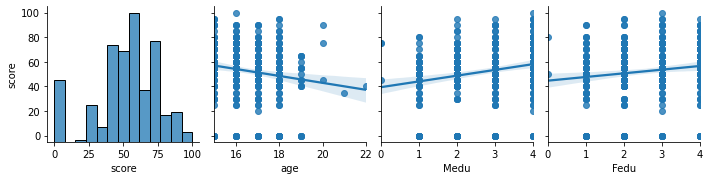

In [1806]:
sns.pairplot(df, x_vars=['score', 'age', 'Medu', 'Fedu'], y_vars=['score'], kind = 'reg')

In [1807]:
#sns.pairplot(df, vars=['score', 'age', 'Medu', 'Fedu'], kind = 'reg')

In [1808]:
df[['score', 'age', 'Medu', 'Fedu']].corr()

,score,age,Medu,Fedu
score,1.000000,-0.155726,0.223656,0.139329
age,-0.155726,1.000000,-0.147868,-0.159147
Medu,0.223656,-0.147868,1.000000,0.599979
Fedu,0.139329,-0.159147,0.599979,1.000000


Здесть мы выдим небольшую корреляцию результатов с возрастом (обратная), и образованием родителей. Эти колонки нужно оставить для дальнейшей работы.

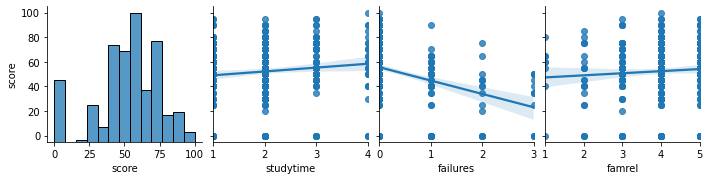

In [1809]:
#sns.pairplot(df, vars=['score', 'studytime', 'failures', 'famrel'], kind = 'reg')
sns.pairplot(df, x_vars=['score', 'studytime', 'failures', 'famrel'], y_vars=['score'], kind = 'reg')

In [1810]:
df[['score', 'studytime', 'failures', 'famrel']].corr()

,score,studytime,failures,famrel
score,1.000000,0.114295,-0.337187,0.066424
studytime,0.114295,1.000000,-0.169399,0.038020
failures,-0.337187,-0.169399,1.000000,-0.034004
famrel,0.066424,0.038020,-0.034004,1.000000


Также колонки с временнем на учебу и неудачами подойдут.

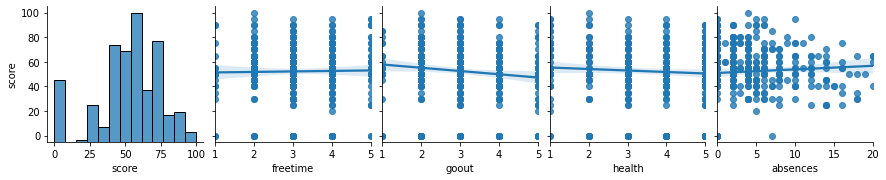

In [1811]:
#sns.pairplot(df, vars=['score', 'freetime', 'goout', 'health', 'absences'], kind = 'reg')
sns.pairplot(df, x_vars=['score', 'freetime', 'goout', 'health', 'absences'], y_vars=['score'], kind = 'reg')

In [1812]:
df[['score', 'freetime', 'goout', 'health', 'absences']].corr()

,score,freetime,goout,health,absences
score,1.000000,0.017481,-0.127742,-0.073208,0.061197
freetime,0.017481,1.000000,0.294450,0.063718,0.080748
goout,-0.127742,0.294450,1.000000,-0.016427,0.098060
health,-0.073208,0.063718,-0.016427,1.000000,-0.007622
absences,0.061197,0.080748,0.098060,-0.007622,1.000000


Из этого набора можно оставить колонку goout, которая имеет небольшую обратную корреляцию.

В итоге, мы можем убрать из нашего сета колонки **freetime, health, famrel, absences**

# 3. Анализ номинативных переменных

In [1813]:
lst=list(df.select_dtypes(['object']).columns)

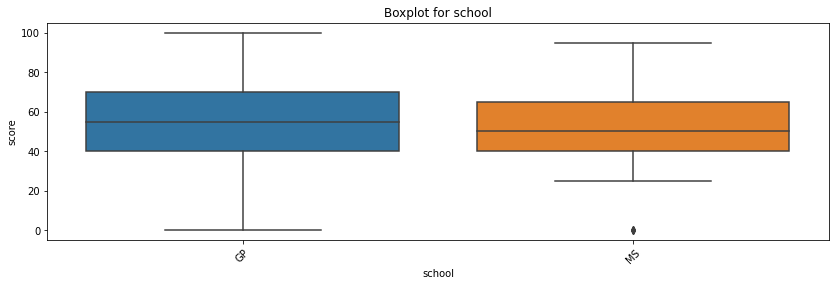

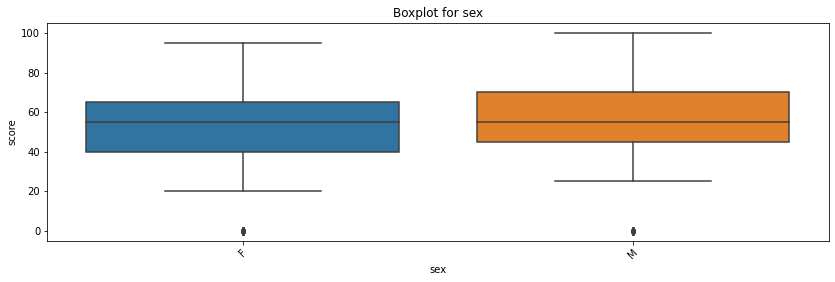

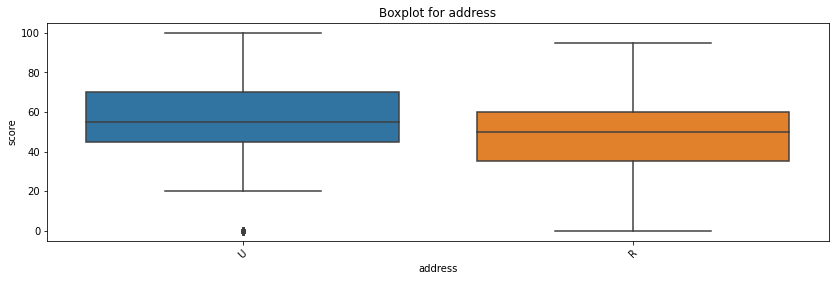

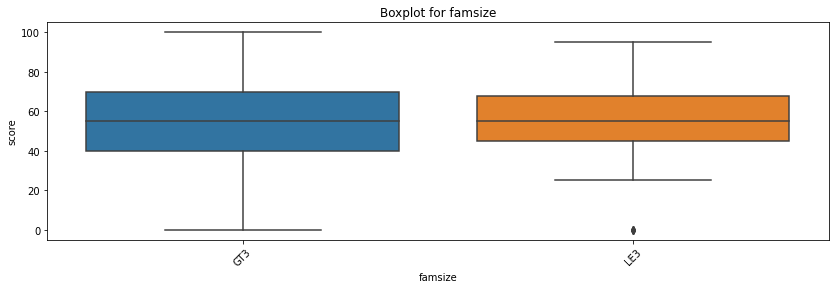

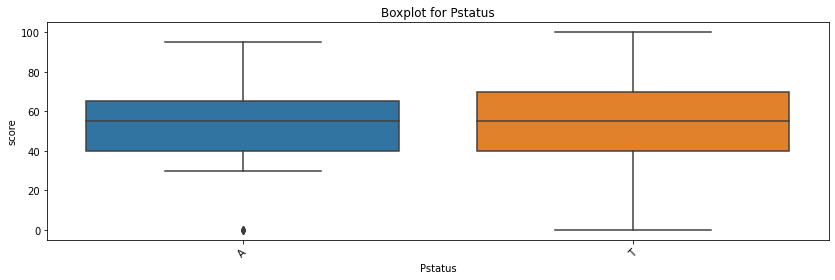

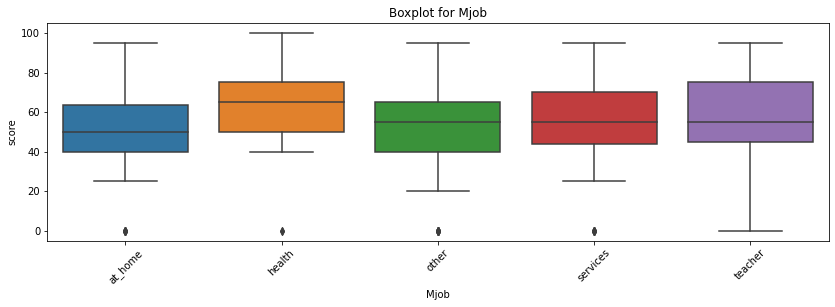

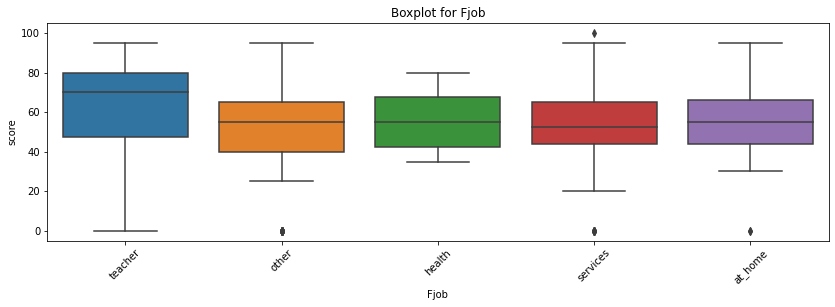

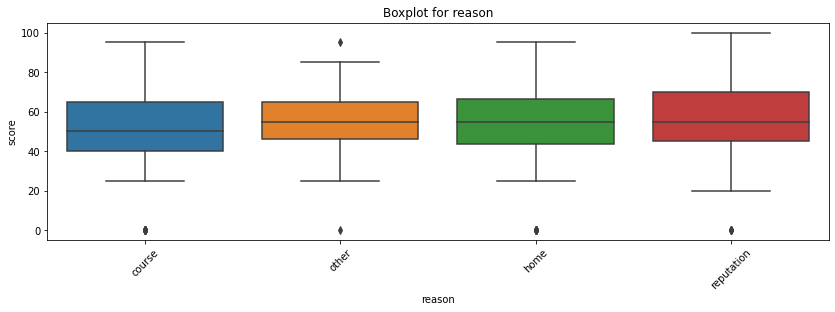

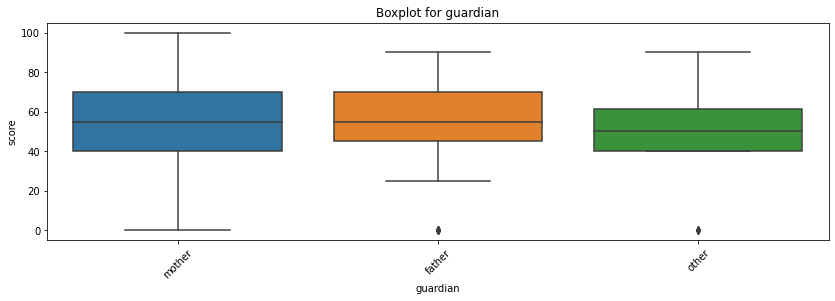

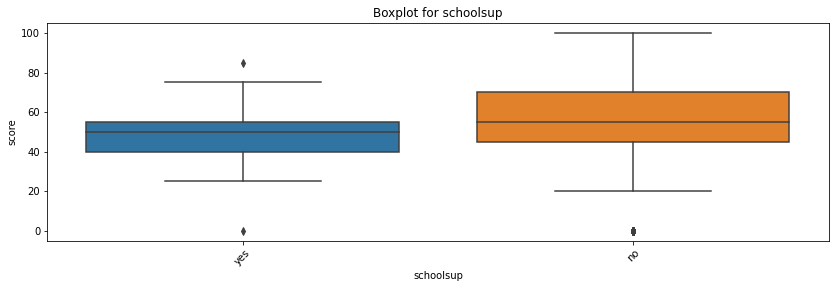

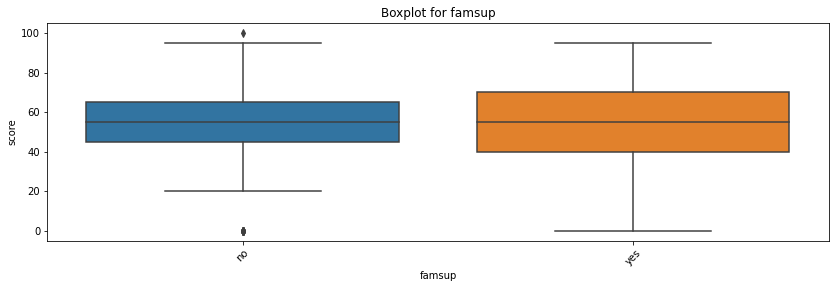

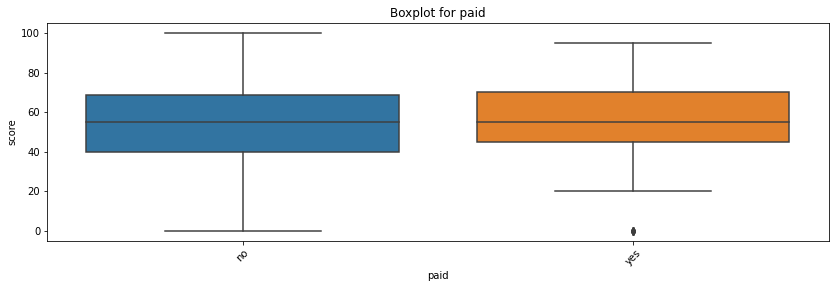

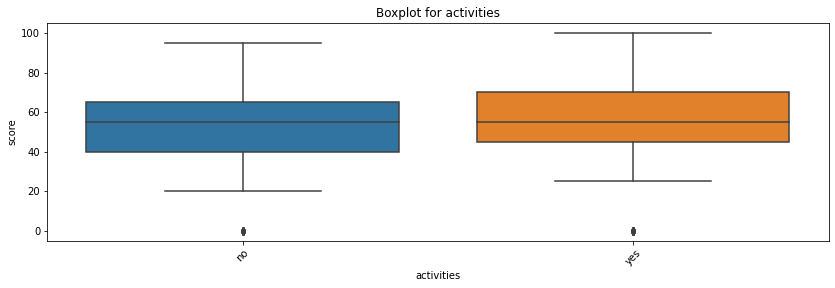

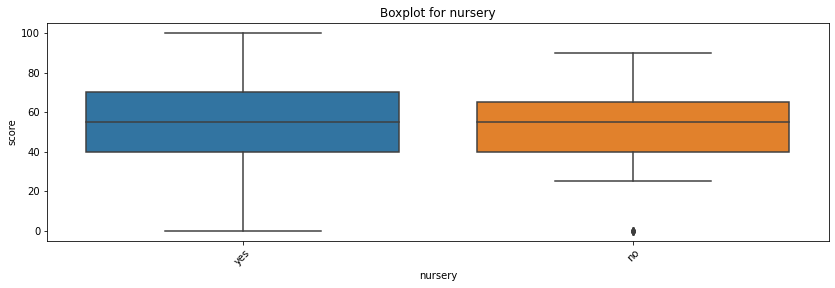

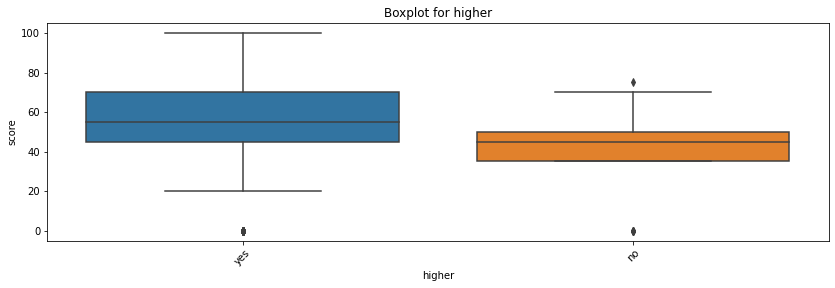

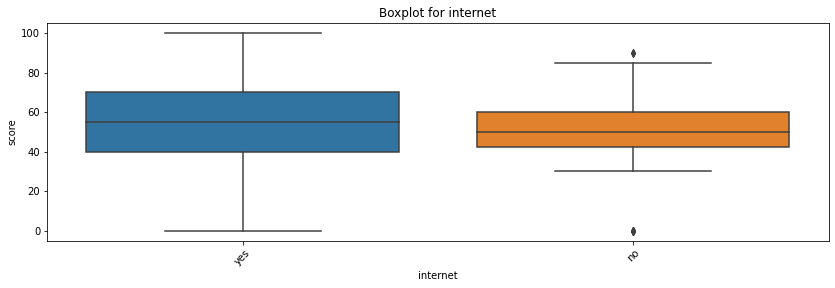

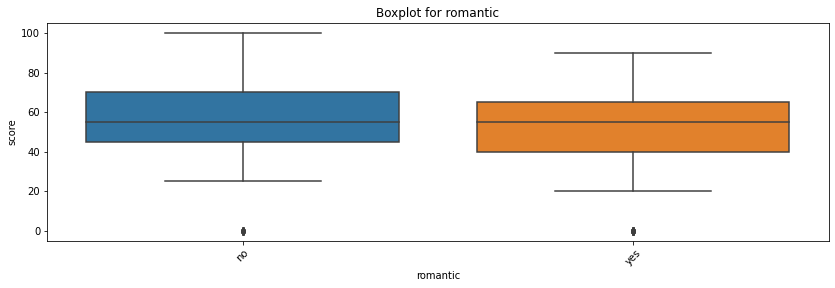

In [1814]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=df[column], y=df['score'], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in lst:
    get_boxplot(col)

# теста Стьюдента

С коэффициентом 0.05

In [1815]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1816]:
for col in lst:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


С коэффициентом 0.01

In [1821]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.01/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in lst:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


С коэффициентом 0.1

In [1822]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.1/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in lst:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
